# 1. Install and import all necessary libraries in your Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import folium
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

# 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.            
Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [2]:
#path 

path = r'/Users/katiekulp/Desktop/Data Course/Part 6/DATA'

In [3]:
#import data

df= pd.read_csv(os.path.join(path, 'NEW_CA_data.csv'), index_col = 0)

In [4]:
county_geo = path + '\California_Counties.geojson'

In [5]:
df.columns

Index(['Census Tract', 'Total Population', 'California County', 'County',
       'countytrim', 'ZIP', 'Longitude', 'Latitude', 'Ozone', 'PM2.5',
       'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic',
       'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste',
       'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Low Birth Weight',
       'Cardiovascular Disease', 'Education', 'Linguistic Isolation',
       'Poverty', 'Unemployment', 'Housing Burden'],
      dtype='object')

## I am going to use the subsets that I created in exercise 6.2 to help with this task

In [6]:
# make a list of the column names grouped to make df easier

health = ['Asthma', 'Low Birth Weight','Cardiovascular Disease']

air_pollution = ['Ozone', 'PM2.5', 'Diesel PM' ]

eco_hazards = [ 'Drinking Water', 'Pesticides', 'Tox. Release', 
       'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste',
       'Imp. Water Bodies', 'Solid Waste',]

demographics = ['Poverty', 'Education', 'Unemployment'  ]

In [7]:
# make smaller subsets to make analysis more viewable

df_all = df[['Ozone', 'PM2.5', 'Diesel PM',
       'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic',
       'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste',
       'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Low Birth Weight',
       'Cardiovascular Disease', 'Education', 'Linguistic Isolation',
       'Poverty', 'Unemployment', 'Housing Burden']]

## Preprocessing: standardize data and remove NaN

In [8]:
col_to_standardize = df_all.columns

### Using the sci-kit learn standard scaler

In [9]:
scaler = StandardScaler()

In [10]:
df_all = pd.DataFrame(scaler.fit_transform(df_all[col_to_standardize]), columns=col_to_standardize)

In [11]:
df_all = df_all.dropna()

In [12]:
df_all.shape

(7557, 20)

In [13]:
df_all

,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Asthma,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden
0,1.715281,1.933128,1.725901,0.837602,-0.112155,1.224051,-0.037368,4.363265,0.826614,0.232287,-0.725993,4.146810,2.607571,1.588182,1.973840,2.142689,0.579251,1.964657,1.437912,0.763945
1,1.422402,1.128636,1.139301,1.733895,-0.112652,0.343382,-0.177211,3.498227,0.558404,0.541645,0.381031,2.075239,0.284193,1.330325,1.573290,2.142689,2.302337,1.777609,0.406058,1.691383
2,1.422402,1.933128,1.662404,0.837602,-0.112054,0.738468,-0.403971,0.824475,0.400230,-0.172259,-0.725993,0.056785,2.950611,3.341603,2.253215,1.453081,0.629341,2.481501,1.145878,2.378375
3,-0.139617,0.832244,0.289589,-0.776574,-0.108486,-0.063311,0.398948,2.524304,3.201984,0.232287,3.480698,5.262271,2.952247,0.808167,2.172432,1.359043,0.489090,1.226309,1.827290,0.202901
4,1.715281,1.933128,-0.020601,2.117263,1.154772,1.481994,-0.559774,3.123176,1.059062,8.598564,-0.725993,10.319030,1.260286,-0.307061,1.532898,1.628617,0.428982,1.477347,1.632601,1.004392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,-0.139617,0.320294,-0.465494,0.435141,-0.113088,-0.189016,-0.067931,-0.397466,-0.431906,-0.308241,0.823841,-0.474387,-1.449666,-2.318339,-1.644575,-1.198776,-0.923440,-1.530192,-1.229332,-1.319930
7924,-1.213505,-1.937478,-1.033911,2.119389,-0.112522,-0.253479,-0.552489,-0.433761,-0.404398,-0.308241,-0.725993,-0.474387,-1.320044,-2.550409,-1.897022,-0.998162,-0.993566,-1.067494,-1.112518,-1.251231
7926,-0.530122,-0.003043,-0.926336,-0.891970,-0.113146,-0.245253,-0.559950,-0.385368,-0.431906,-0.308241,-0.504588,-0.474387,-1.156053,-2.021804,-1.526766,-1.198776,-0.863332,-1.357911,-1.774462,-1.090933
7927,-1.408758,-0.808011,-1.038148,-1.610335,-0.113142,-0.219740,-0.808721,-0.506352,-0.349381,-0.240250,-0.725993,-0.474387,-1.255233,-2.763141,-0.853572,-1.136084,-0.803225,-1.613872,-1.482428,-1.812274


# 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [14]:
# set a variable to the range off potential clusters
num_cl = range(1, 10) 

# For every number in the range, this assigns a kmean with the corresponding # of clusters
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl]

In [15]:
# this calculates a score (the sum of the squared distances between the center and each data point) for each of the
# potential cluster numbers

score = [kmeans[i].fit(df_all).score(df_all) for i in range(len(kmeans))] 

score

[-146737.1032331193,
 -123273.0994393765,
 -115293.80515083131,
 -108622.485724112,
 -104201.63243805338,
 -99322.51731887402,
 -95859.72436238457,
 -91405.79685257374,
 -89074.65347329936]

# 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
Explain why you chose that number in a markdown cell.
If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.


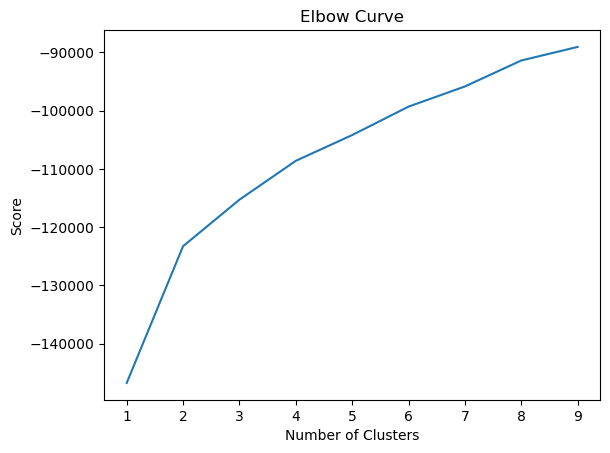

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4. Based on the fact that the chart starts to flattern out after about 5 clusters, I will use 5 for my k-means algorithm

# 5. Run the k-means algorithm.

In [17]:
# Create the k-means object. Number of clusters will be 4

kmeans = KMeans(n_clusters = 5,n_init=10)


In [18]:
# fit the kmeans onto the data set

kmeans.fit(df_all)

KMeans(n_clusters=5, n_init=10)

# 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [19]:
df_all.loc[:, 'clusters'] = kmeans.fit_predict(df_all)

In [20]:
df_all.head()

,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,...,Solid Waste,Asthma,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden,clusters
0,1.715281,1.933128,1.725901,0.837602,-0.112155,1.224051,-0.037368,4.363265,0.826614,0.232287,...,4.146810,2.607571,1.588182,1.973840,2.142689,0.579251,1.964657,1.437912,0.763945,3
1,1.422402,1.128636,1.139301,1.733895,-0.112652,0.343382,-0.177211,3.498227,0.558404,0.541645,...,2.075239,0.284193,1.330325,1.573290,2.142689,2.302337,1.777609,0.406058,1.691383,1
2,1.422402,1.933128,1.662404,0.837602,-0.112054,0.738468,-0.403971,0.824475,0.400230,-0.172259,...,0.056785,2.950611,3.341603,2.253215,1.453081,0.629341,2.481501,1.145878,2.378375,1
3,-0.139617,0.832244,0.289589,-0.776574,-0.108486,-0.063311,0.398948,2.524304,3.201984,0.232287,...,5.262271,2.952247,0.808167,2.172432,1.359043,0.489090,1.226309,1.827290,0.202901,3
4,1.715281,1.933128,-0.020601,2.117263,1.154772,1.481994,-0.559774,3.123176,1.059062,8.598564,...,10.319030,1.260286,-0.307061,1.532898,1.628617,0.428982,1.477347,1.632601,1.004392,3


In [21]:
# check the new clusters

df_all['clusters'].value_counts()

0    3202
2    2060
1    1930
3     338
4      27
Name: clusters, dtype: int64

# 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

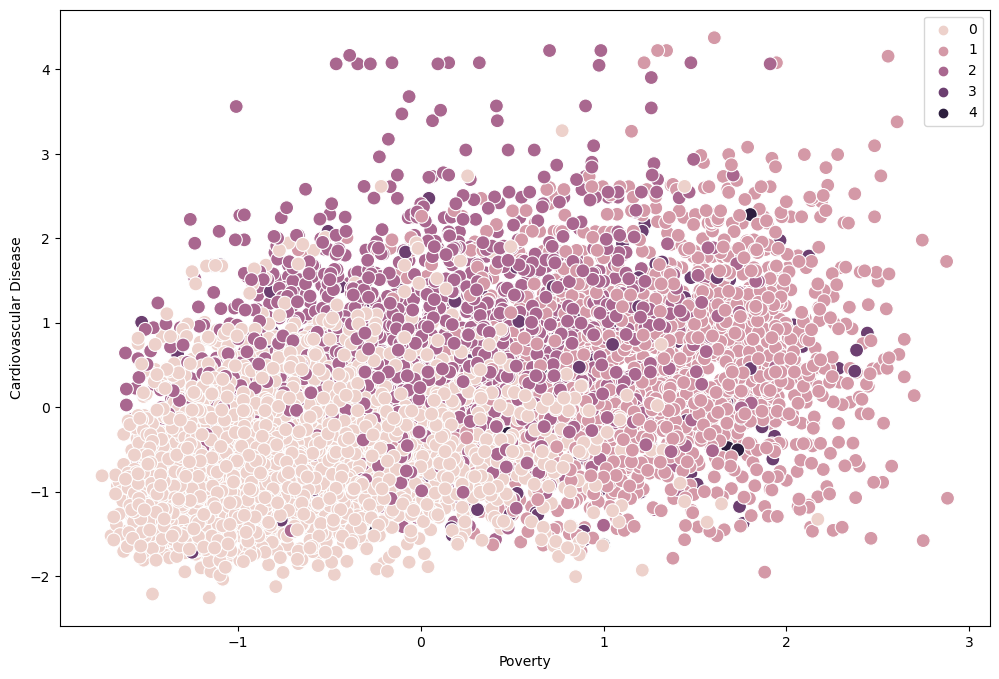

In [22]:
# poverty and Cardiovascular disease

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all['Poverty'], y=df_all['Cardiovascular Disease'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Poverty') # Label x-axis.
plt.ylabel('Cardiovascular Disease') # Label y-axis.
plt.show()

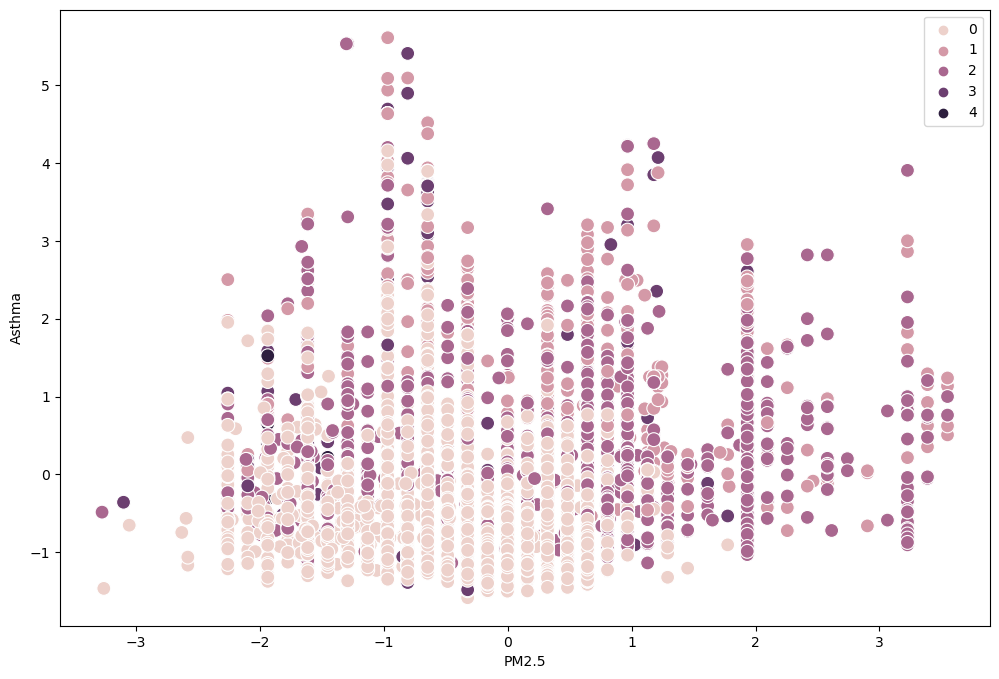

In [23]:
# PM2.5 and Asthma

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all['PM2.5'], y=df_all['Asthma'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('PM2.5') 
plt.ylabel('Asthma')
plt.show()

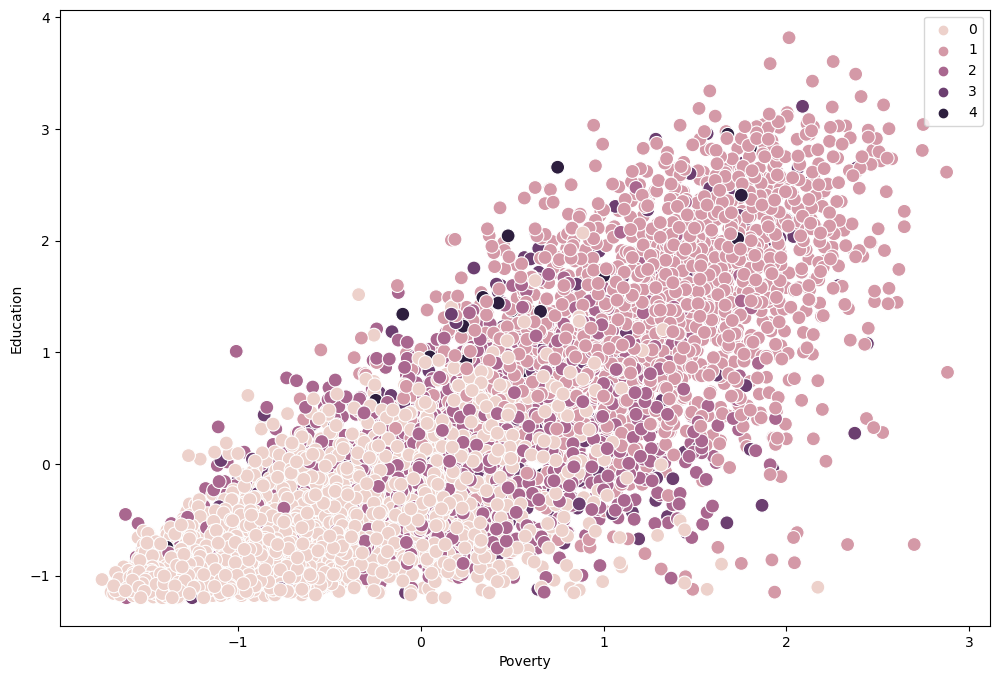

In [24]:
# Poverty and Education

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all['Poverty'], y=df_all['Education'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Poverty') 
plt.ylabel('Education')
plt.show()

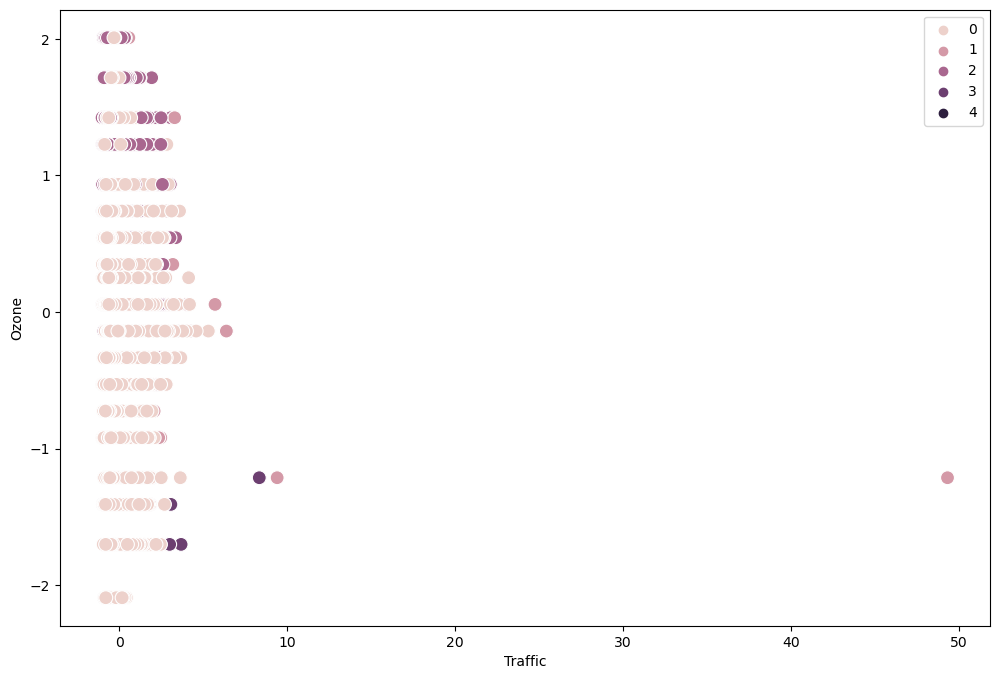

In [25]:
# Traffic and Ozone 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all['Traffic'], y=df_all['Ozone'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Traffic') 
plt.ylabel('Ozone')
plt.show()

# 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.

## There are distinct clusters around certain areas when the data is standardized.

# 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [26]:
grouped_df = df_all.groupby('clusters').agg(['mean', 'median'])

In [27]:
pd.options.display.max_columns = None
grouped_df

Ozone               PM2.5           Diesel PM            \
              mean    median      mean    median      mean    median   
clusters                                                               
0        -0.575977 -0.530122 -0.414522 -0.323953 -0.135549 -0.333909   
1         0.078904 -0.139617  0.418342  0.643631  0.404399  0.229740   
2         0.922044  0.934271  0.359491  0.481962 -0.227445 -0.265528   
3        -0.602331 -0.530122 -0.051346 -0.003043  0.722108  0.313217   
4        -0.844695 -0.920627 -1.286092 -1.776126 -0.492477 -0.521812   

         Drinking Water           Pesticides            Tox. Release  \
                   mean    median       mean     median         mean   
clusters                                                               
0             -0.510191 -0.712117  -0.048767  -0.113146    -0.064600   
1              0.078459  0.212111  -0.070687  -0.113146     0.099922   
2              0.774727  0.761013  -0.037446  -0.113146    -0.027193   
3             -0.272382 -0.390758  -0.008829  -0.113146     0.311774   
4              0.732203  0.645958  13.296164  11.073485    -0.234142   

                     Traffic           Cleanup Sites            \
            median      mean    median          mean    median   
clusters                                                         
0        -0.236616 -0.075224 -0.325282     -0.176400 -0.435274   
1        -0.081893  0.266531 -0.067876     -0.008184 -0.234137   
2        -0.200300 -0.118836 -0.360821     -0.205835 -0.445860   
3        -0.196944  0.274834  0.063442      2.713073  2.061539   
4        -0.250220 -0.351918 -0.414365      0.078405 -0.234137   

         Groundwater Threats           Haz. Waste           Imp. Water Bodies  \
                        mean    median       mean    median              mean   
clusters                                                                        
0                  -0.075882 -0.266855  -0.159638 -0.274245          0.124708   
1                  -0.059398 -0.225592  -0.069859 -0.241950         -0.081395   
2                  -0.204811 -0.370012  -0.166034 -0.289543         -0.324670   
3                   2.105716  1.250247   2.626742  2.006849          0.899826   
4                   0.231357 -0.184329  -0.055919 -0.240250          1.512656   

                   Solid Waste              Asthma           Low Birth Weight  \
            median        mean    median      mean    median             mean   
clusters                                                                        
0        -0.283183   -0.155083 -0.474387 -0.490357 -0.665060        -0.391090   
1        -0.725993   -0.050094 -0.368153  0.661814  0.446875         0.509581   
2        -0.725993   -0.065601 -0.474387  0.099063 -0.062121         0.082893   
3         0.823841    1.848438  1.119129  0.663093  0.322327         0.387835   
4         1.488055    0.572612 -0.208801  0.123171  0.210544        -0.316850   

                   Cardiovascular Disease           Education            \
            median                   mean    median      mean    median   
clusters                                                                  
0        -0.423096              -0.586963 -0.651614 -0.668043 -0.791280   
1         0.414936               0.473794  0.412031  1.234674  1.196045   
2         0.047491               0.519727  0.410348 -0.146807 -0.258401   
3         0.315017               0.156347  0.201658  0.323537  0.130287   
4        -0.210365              -0.211795 -0.382337  0.885141  0.957817   

         Linguistic Isolation             Poverty           Unemployment  \
                         mean    median      mean    median         mean   
clusters                                                                   
0                   -0.461391 -0.632920 -0.715188 -0.831222    -0.570356   
1                    1.115756  0.969951  1.189297  1.201697     0.655563   
2                   -0.339258 -0.472633 -0.051968 -

### To try to help interpret this, I will break the data set down into the subsets I defined in 6.2

In [28]:
df_pollutants = df_all[health + air_pollution + ['clusters'] ]

df_traffic = df_all[['Traffic'] + air_pollution + ['clusters'] ]

df_demohealth = df_all[ health + demographics + ['clusters'] ]
                 
df_ecohazards = df_all[eco_hazards + health + ['Poverty'] + ['clusters'] ]  

## Pollutants

In [29]:
df_pollstats = df_pollutants.groupby('clusters').agg(['mean', 'median'])
df_pollstats

Asthma           Low Birth Weight            \
              mean    median             mean    median   
clusters                                                  
0        -0.490357 -0.665060        -0.391090 -0.423096   
1         0.661814  0.446875         0.509581  0.414936   
2         0.099063 -0.062121         0.082893  0.047491   
3         0.663093  0.322327         0.387835  0.315017   
4         0.123171  0.210544        -0.316850 -0.210365   

         Cardiovascular Disease               Ozone               PM2.5  \
                           mean    median      mean    median      mean   
clusters                                                                  
0                     -0.586963 -0.651614 -0.575977 -0.530122 -0.414522   
1                      0.473794  0.412031  0.078904 -0.139617  0.418342   
2                      0.519727  0.410348  0.922044  0.934271  0.359491   
3                      0.156347  0.201658 -0.602331 -0.530122 -0.051346   
4                     -0.211795 -0.382337 -0.844695 -0.920627 -1.286092   

                   Diesel PM            
            median      mean    median  
clusters                                
0        -0.323953 -0.135549 -0.333909  
1         0.643631  0.404399  0.229740  
2         0.481962 -0.227445 -0.265528  
3        -0.003043  0.722108  0.313217  
4        -1.776126 -0.492477 -0.521812

### It seems that the clusters are high for the health makers and those that are high for Asthma also are high for the Diesel PM

## Traffic

In [30]:
df_trafficstats = df_traffic.groupby('clusters').agg(['mean', 'median'])
df_trafficstats

Traffic               Ozone               PM2.5            \
              mean    median      mean    median      mean    median   
clusters                                                               
0        -0.075224 -0.325282 -0.575977 -0.530122 -0.414522 -0.323953   
1         0.266531 -0.067876  0.078904 -0.139617  0.418342  0.643631   
2        -0.118836 -0.360821  0.922044  0.934271  0.359491  0.481962   
3         0.274834  0.063442 -0.602331 -0.530122 -0.051346 -0.003043   
4        -0.351918 -0.414365 -0.844695 -0.920627 -1.286092 -1.776126   

         Diesel PM            
              mean    median  
clusters                      
0        -0.135549 -0.333909  
1         0.404399  0.229740  
2        -0.227445 -0.265528  
3         0.722108  0.313217  
4        -0.492477 -0.521812

### It does seem that the clusters have different values and the higher traffic clusters may also have higher rates of air pollutants

## Demographics and Health

In [31]:
df_demostats = df_demohealth.groupby('clusters').agg(['mean', 'median'])
df_demostats

Asthma           Low Birth Weight            \
              mean    median             mean    median   
clusters                                                  
0        -0.490357 -0.665060        -0.391090 -0.423096   
1         0.661814  0.446875         0.509581  0.414936   
2         0.099063 -0.062121         0.082893  0.047491   
3         0.663093  0.322327         0.387835  0.315017   
4         0.123171  0.210544        -0.316850 -0.210365   

         Cardiovascular Disease             Poverty           Education  \
                           mean    median      mean    median      mean   
clusters                                                                  
0                     -0.586963 -0.651614 -0.715188 -0.831222 -0.668043   
1                      0.473794  0.412031  1.189297  1.201697  1.234674   
2                      0.519727  0.410348 -0.051968 -0.073185 -0.146807   
3                      0.156347  0.201658  0.332295  0.298451  0.323537   
4                     -0.211795 -0.382337  0.269555  0.340291  0.885141   

                   Unemployment            
            median         mean    median  
clusters                                   
0        -0.791280    -0.570356 -0.645264  
1         1.196045     0.655563  0.522872  
2        -0.258401     0.211435  0.094555  
3         0.130287     0.146396  0.055617  
4         0.957817    -0.197479 -0.392168

## Environmental Hazards

In [32]:
df_ecostats = df_ecohazards.groupby('clusters').agg(['mean', 'median'])
df_ecostats

Drinking Water           Pesticides            Tox. Release  \
                   mean    median       mean     median         mean   
clusters                                                               
0             -0.510191 -0.712117  -0.048767  -0.113146    -0.064600   
1              0.078459  0.212111  -0.070687  -0.113146     0.099922   
2              0.774727  0.761013  -0.037446  -0.113146    -0.027193   
3             -0.272382 -0.390758  -0.008829  -0.113146     0.311774   
4              0.732203  0.645958  13.296164  11.073485    -0.234142   

                   Cleanup Sites           Groundwater Threats            \
            median          mean    median                mean    median   
clusters                                                                   
0        -0.236616     -0.176400 -0.435274           -0.075882 -0.266855   
1        -0.081893     -0.008184 -0.234137           -0.059398 -0.225592   
2        -0.200300     -0.205835 -0.445860           -0.204811 -0.370012   
3        -0.196944      2.713073  2.061539            2.105716  1.250247   
4        -0.250220      0.078405 -0.234137            0.231357 -0.184329   

         Haz. Waste           Imp. Water Bodies           Solid Waste  \
               mean    median              mean    median        mean   
clusters                                                                
0         -0.159638 -0.274245          0.124708 -0.283183   -0.155083   
1         -0.069859 -0.241950         -0.081395 -0.725993   -0.050094   
2         -0.166034 -0.289543         -0.324670 -0.725993   -0.065601   
3          2.626742  2.006849          0.899826  0.823841    1.848438   
4         -0.055919 -0.240250          1.512656  1.488055    0.572612   

                      Asthma           Low Birth Weight            \
            median      mean    median             mean    median   
clusters                                                            
0        -0.474387 -0.490357 -0.665060        -0.391090 -0.423096   
1        -0.368153  0.661814  0.446875         0.509581  0.414936   
2        -0.474387  0.099063 -0.062121         0.082893  0.047491   
3         1.119129  0.663093  0.322327         0.387835  0.315017   
4        -0.208801  0.123171  0.210544        -0.316850 -0.210365   

         Cardiovascular Disease             Poverty            
                           mean    median      mean    median  
clusters                                                       
0                     -0.586963 -0.651614 -0.715188 -0.831222  
1                      0.473794  0.412031  1.189297  1.201697  
2                      0.519727  0.410348 -0.051968 -0.073185  
3                      0.156347  0.201658  0.332295  0.298451  
4                     -0.211795 -0.382337  0.269555  0.340291

## 9. The means for most of the health factors between clusters does not seem to differ too much,  however some of the environmental hazards and pollutants have very different values when comparing the clusters

# 10. Propose what these results could be useful for in future steps of an analytics pipeline

## There are distinct clusters and it would be worth while to futher explore the relationship between asthma and air pollutants and traffic and air pollutants based on the clusters.

In [33]:
df_all.columns

Index(['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides',
       'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'clusters'],
      dtype='object')

In [38]:
clusters= path + "/clusters.xlsx"

In [39]:
df_all.to_excel(clusters, index = 0)